In [1]:
# Reload the uploaded datasets into DataFrames
import pandas as pd

# File paths for the uploaded datasets
file_paths = {
    "football_player": "football_player.csv",
    "football_team": "football_team.csv",
    "player_combine": "player_combine.csv"
}

# Load datasets into DataFrames
dataframes = {}
for name, path in file_paths.items():
    try:
        dataframes[name] = pd.read_csv(path)
        print(f"{name} dataset loaded successfully.")
    except Exception as e:
        print(f"Error loading {name}: {e}")

# Display the structure of each DataFrame
for name, df in dataframes.items():
    print(f"\n{name} dataset preview:")
    print(df.head())


football_player dataset loaded successfully.
football_team dataset loaded successfully.
player_combine dataset loaded successfully.

football_player dataset preview:
   Fumbles Lost  Games Played          Player Name Position Team  \
0           0.0          16.0  Christian McCaffrey       RB  CAR   
1           2.0          15.0        Lamar Jackson       QB  BAL   
2           3.0          15.0        Derrick Henry       RB  TEN   
3           2.0          16.0          Aaron Jones       RB  GNB   
4           2.0          16.0      Ezekiel Elliott       RB  DAL   

   Passing Yards  Rushing Yards  Receiving Yards  Passing TDs  Rushing TDs  \
0            0.0         1387.0           1005.0          NaN          NaN   
1         3127.0         1206.0              0.0          NaN          NaN   
2            0.0         1540.0            206.0          NaN          NaN   
3            0.0         1084.0            474.0          NaN          NaN   
4            0.0         1357.0    

In [2]:
import sqlite3

# Create a SQLite database and load the DataFrames into tables
conn = sqlite3.connect('nfl_analysis.db')

# Save each DataFrame as a table in the SQLite database
for table_name, df in dataframes.items():
    df.to_sql(table_name, conn, if_exists='replace', index=False)

# Verify that the tables were created successfully
tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
conn.close()

# Show the tables in the database
tables


,name
0,football_player
1,football_team
2,player_combine


In [3]:
# Reconnect to the SQLite database to perform the join query
conn = sqlite3.connect('nfl_analysis.db')

# SQL query to join the tables
query = """
SELECT 
    fp.[Player Name] AS PlayerName,
    fp.Position AS PlayerPosition,
    fp.Team AS PlayerTeam,
    fp.[Total Yards] AS TotalYards,
    pc.Height,
    pc.Weight,
    pc.[40_Yard] AS FortyYardDash,
    pc.Bench_Press AS BenchPress,
    ft.[Team Name] AS TeamName,
    ft.Wins,
    ft.Losses,
    ft.[Super Bowl Wins] AS SuperBowlWins
FROM football_player fp
LEFT JOIN player_combine pc ON fp.[Player Name] = pc.Name
LEFT JOIN football_team ft ON fp.Team = ft.[Team Name]
"""

# Execute the query and store the merged dataset
merged_df = pd.read_sql(query, conn)
conn.close()

# Display the structure of the merged dataset
merged_df.head()


,PlayerName,PlayerPosition,PlayerTeam,TotalYards,Height,Weight,FortyYardDash,BenchPress,TeamName,Wins,Losses,SuperBowlWins
0,Christian McCaffrey,RB,CAR,2392.0,NaN,NaN,NaN,NaN,None,None,None,None
1,Lamar Jackson,QB,BAL,4333.0,NaN,NaN,NaN,NaN,None,None,None,None
2,Derrick Henry,RB,TEN,1746.0,NaN,NaN,NaN,NaN,None,None,None,None
3,Aaron Jones,RB,GNB,1558.0,NaN,NaN,NaN,NaN,None,None,None,None
4,Ezekiel Elliott,RB,DAL,1777.0,NaN,NaN,NaN,NaN,None,None,None,None


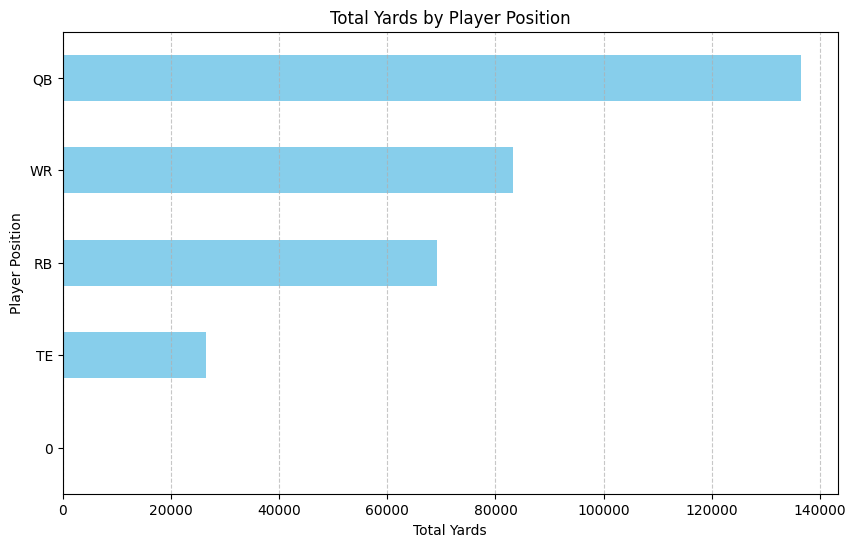

In [4]:
import matplotlib.pyplot as plt

# Visualization 1: Total Yards by Player Position
plt.figure(figsize=(10, 6))
merged_df.groupby('PlayerPosition')['TotalYards'].sum().sort_values().plot(kind='barh', color='skyblue')
plt.title('Total Yards by Player Position')
plt.xlabel('Total Yards')
plt.ylabel('Player Position')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


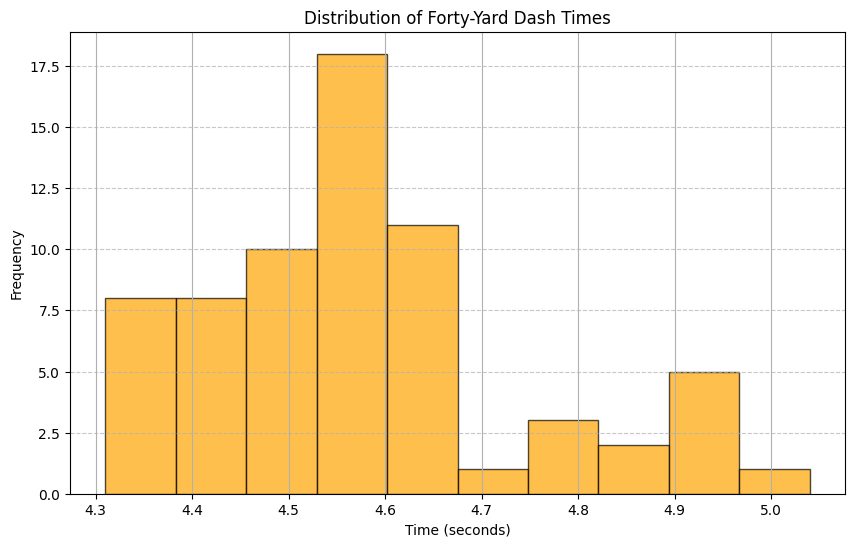

In [5]:
# Visualization 2: Distribution of Forty-Yard Dash Times
if not merged_df['FortyYardDash'].dropna().empty:
    plt.figure(figsize=(10, 6))
    merged_df['FortyYardDash'].dropna().hist(bins=10, alpha=0.7, color='orange', edgecolor='black')
    plt.title('Distribution of Forty-Yard Dash Times')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("No data available for 'FortyYardDash'. Skipping this visualization.")


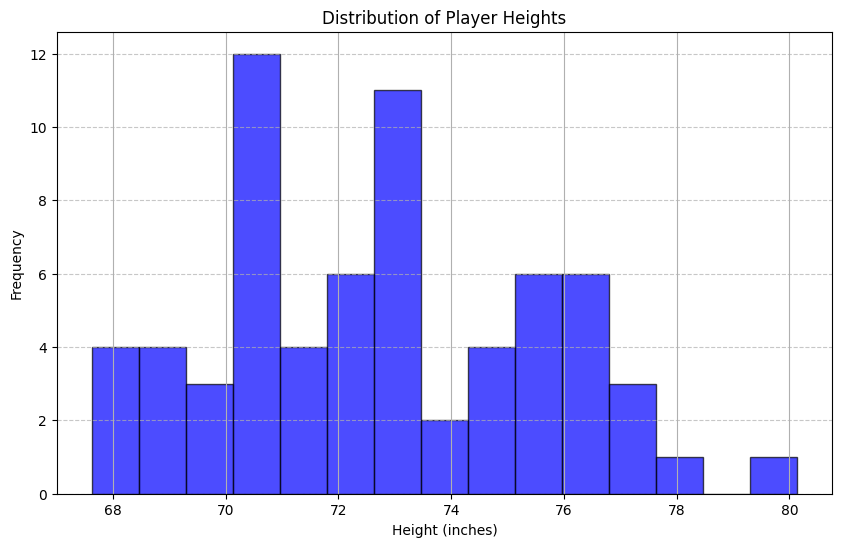

In [6]:
# Visualization 3: Distribution of Player Heights
if not merged_df['Height'].dropna().empty:
    plt.figure(figsize=(10, 6))
    merged_df['Height'].dropna().hist(bins=15, alpha=0.7, color='blue', edgecolor='black')
    plt.title('Distribution of Player Heights')
    plt.xlabel('Height (inches)')
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("No data available for 'Height'. Skipping this visualization.")


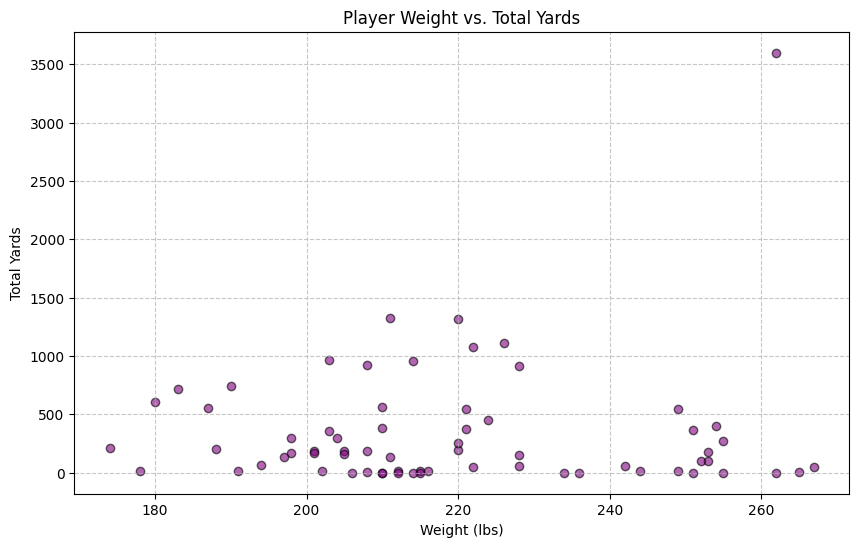

In [7]:
# Visualization 4: Player Weight vs. Total Yards
if not merged_df['Weight'].dropna().empty and not merged_df['TotalYards'].dropna().empty:
    plt.figure(figsize=(10, 6))
    plt.scatter(merged_df['Weight'], merged_df['TotalYards'], alpha=0.6, color='purple', edgecolor='black')
    plt.title('Player Weight vs. Total Yards')
    plt.xlabel('Weight (lbs)')
    plt.ylabel('Total Yards')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()
else:
    print("No data available for 'Weight' or 'TotalYards'. Skipping this visualization.")


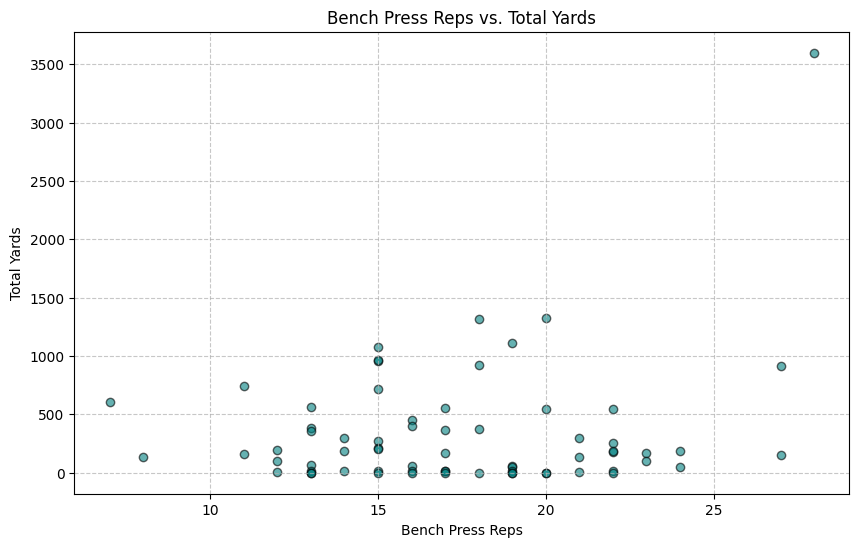

In [8]:
# Visualization 5: Bench Press Reps vs. Total Yards
if not merged_df['BenchPress'].dropna().empty and not merged_df['TotalYards'].dropna().empty:
    plt.figure(figsize=(10, 6))
    plt.scatter(merged_df['BenchPress'], merged_df['TotalYards'], alpha=0.6, color='teal', edgecolor='black')
    plt.title('Bench Press Reps vs. Total Yards')
    plt.xlabel('Bench Press Reps')
    plt.ylabel('Total Yards')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()
else:
    print("No data available for 'BenchPress' or 'TotalYards'. Skipping this visualization.")



What did you learn?

Through this project, I gained a deeper understanding of how to clean, transform, and merge datasets from multiple sources, including CSV files, APIs, and web scraping. Each dataset offered unique challenges, such as handling missing data, aligning mismatched columns, and ensuring data consistency during merges. Working with SQLite for data storage and querying reinforced the importance of structuring data effectively for relational databases. Additionally, creating visualizations based on merged datasets provided insights into player performance, team statistics, and physical attributes, demonstrating how data analysis can reveal patterns and relationships that might not be obvious at first glance.

What are you still struggling with?

A persistent challenge was dealing with missing or incomplete data, particularly when columns from different datasets didn't align perfectly (e.g., names or team identifiers not matching across datasets). Ensuring accurate joins between datasets required careful consideration of critical fields, but discrepancies led to incomplete results. Another area of difficulty was understanding the limitations of the data; for instance, interpreting results where essential fields, such as Wins or 40_Yard times, had too many null values to be helpful. Lastly, balancing data cleaning with maintaining data integrity remained a nuanced task, as overly aggressive cleaning could unintentionally remove valuable insights.

What ethical implications exist when transforming data?

Transforming data raises ethical concerns, including the potential for bias, misrepresentation, and loss of context. When manipulating datasets, removing outliers or imputing missing values might distort the reality of the data or disproportionately affect certain groups. Additionally, merging datasets requires careful validation to ensure that mismatches don't result in misleading correlations. Misrepresentation can also occur if data visualizations are constructed to exaggerate or minimize trends, leading to incorrect conclusions.

What are some ways to mitigate those risks?

Transparency is critical to mitigate ethical risks. Documenting all transformations, including cleaning steps, assumptions, and imputed values, helps maintain accountability. Data transformations should preserve the original data's context and avoid excessive simplification. Validation techniques, such as cross-referencing cleaned data against raw data, can ensure consistency. In visualizations, using neutral and appropriately scaled graphs can prevent misrepresentation. Additionally, involving diverse perspectives during analysis can help identify and address potential biases in the data or transformations. By adhering to these principles, analysts can minimize ethical risks and maintain the integrity of their insights.